In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [4]:
%pip install colorama

In [6]:
pip install twython

In [8]:
df=pd.read_csv("sentimentdataset.csv")

In [9]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [10]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [13]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [14]:
df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

In [15]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [16]:
df['Platform']=df['Platform'].str.strip()

In [17]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


In [18]:
df['Country']=df['Country'].str.strip()

In [19]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Day_of_Week']=df['Timestamp'].dt.day_name()

In [20]:
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

In [21]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added this line to download the missing resource

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text


df["Clean_Text"] = df["Text"].apply(clean)

In [23]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
Februari: 85
Januari: 82
Agustus: 78
September: 77
Juni: 71
Juli: 62
April: 51
November: 49
Oktober: 48
Mei: 46
Maret: 44
Desember: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [24]:
df1 = df.copy()

In [25]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


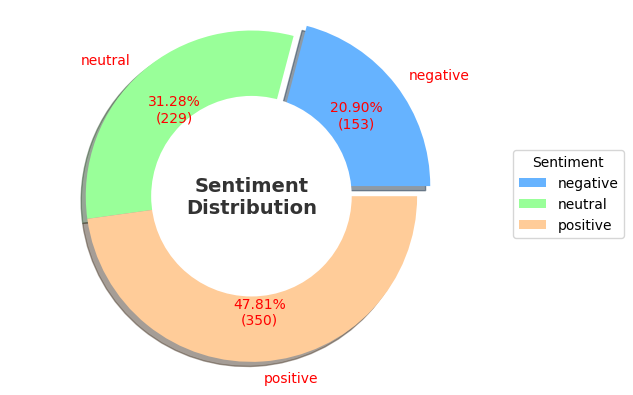

In [26]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

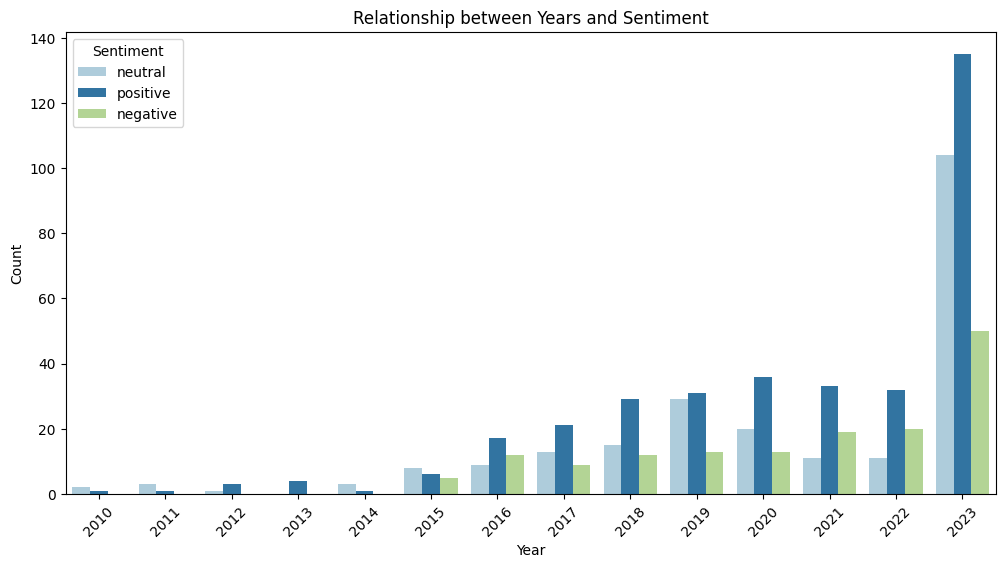

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

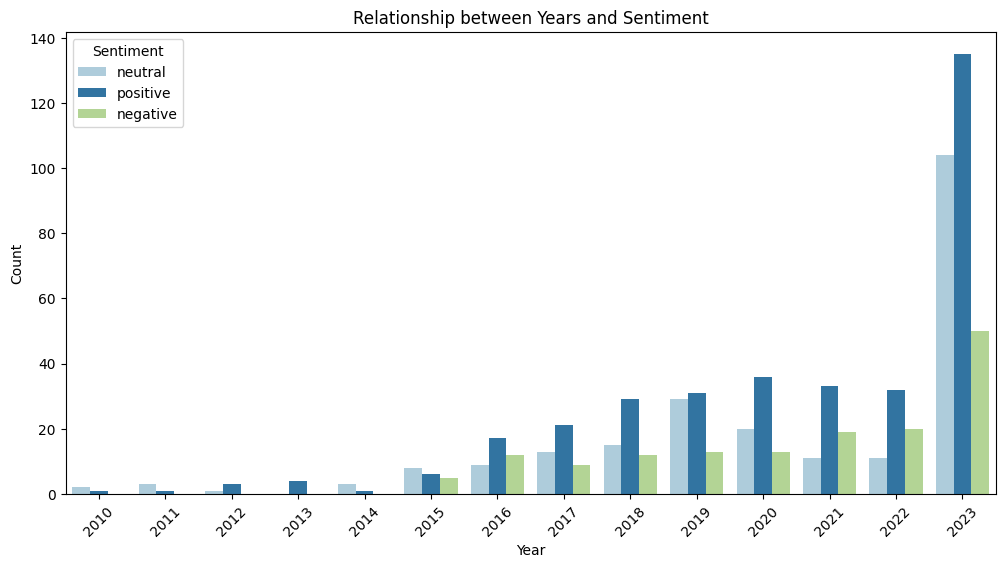

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
#Month

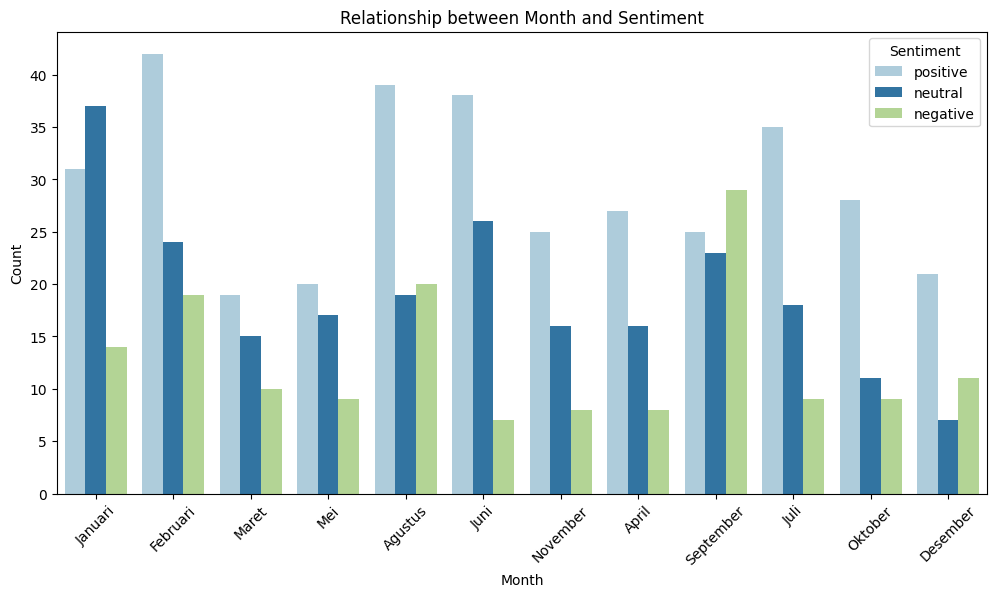

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

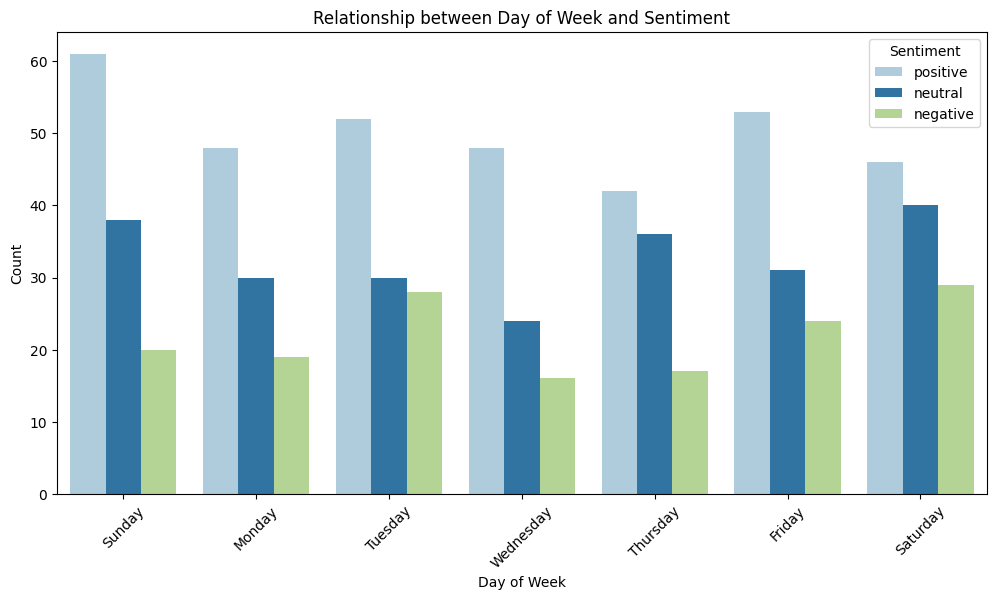

In [31]:
#Day Of Weeek
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

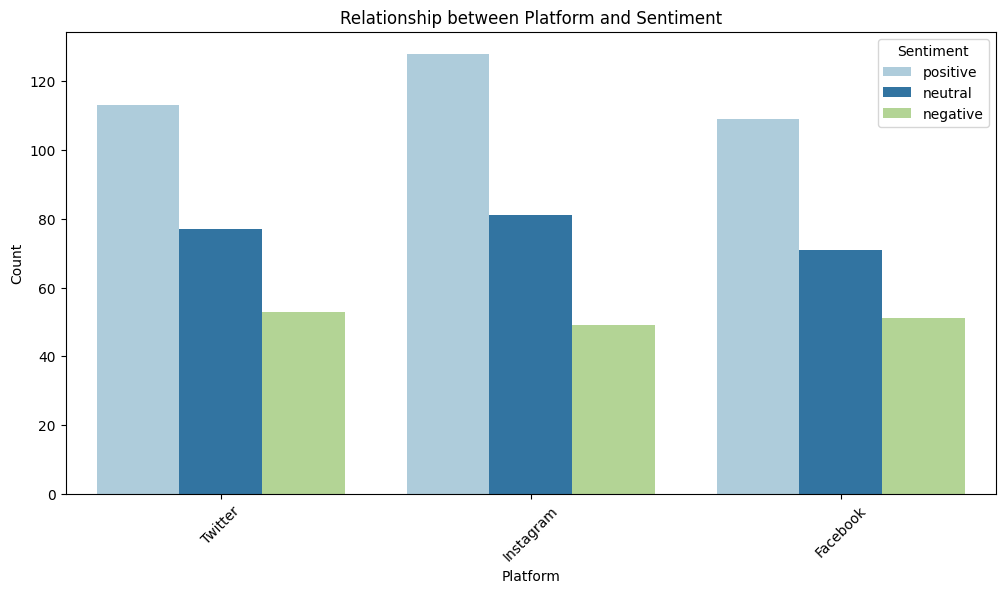

In [32]:
#platform
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

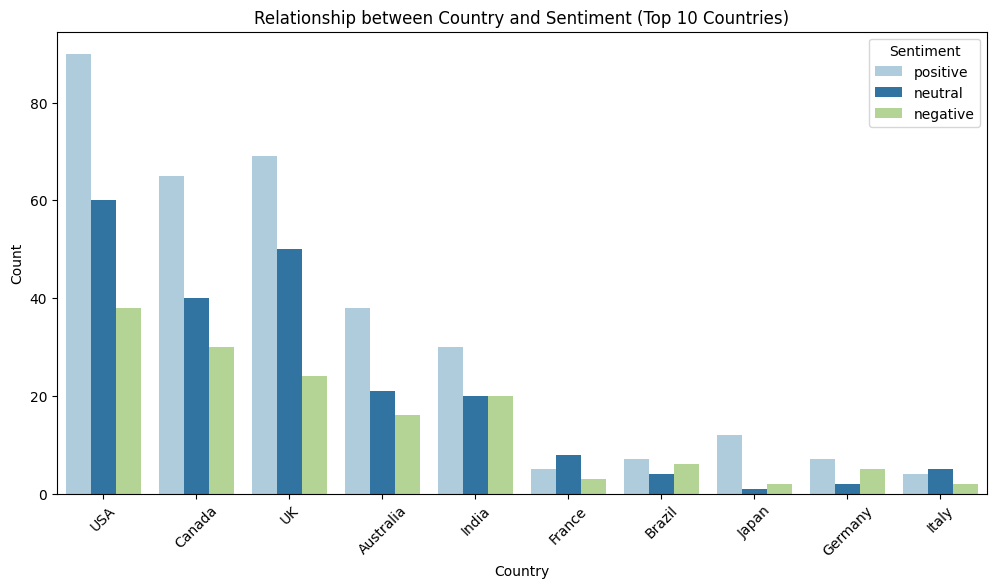

In [35]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [36]:
#common
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [37]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [38]:
#positive
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


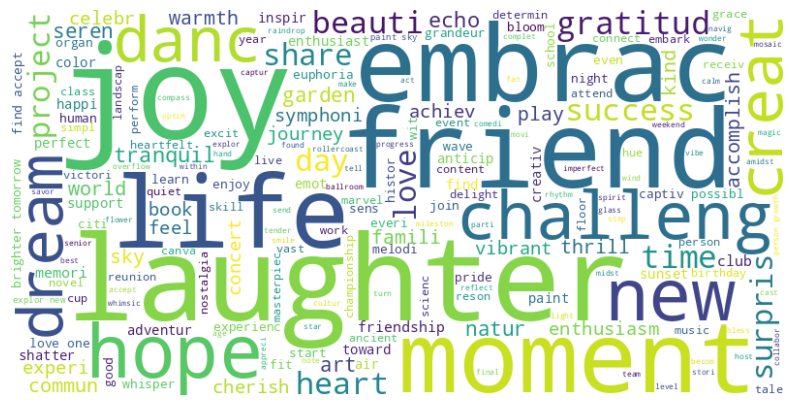

In [39]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
#neutraltop = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')


,Common_words,count
0,joy,30
1,friend,24
2,laughter,24
3,new,21
4,challeng,20
5,life,20
6,hope,20
7,dream,20
8,embrac,19
9,like,19


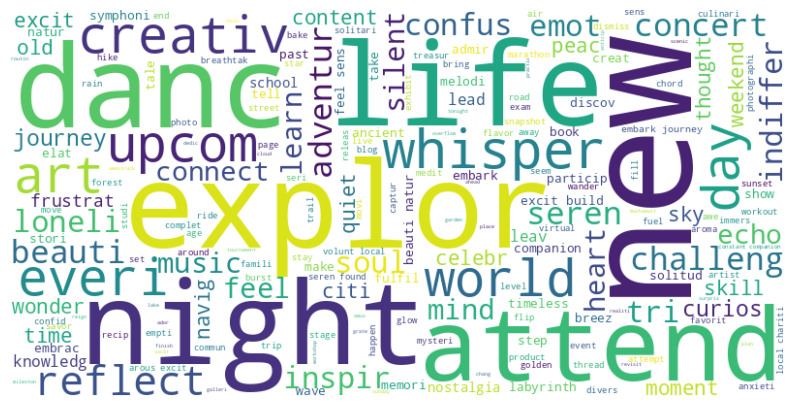

In [41]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
#Negative Common Words
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,despair,14
1,lost,14
2,emot,13
3,feel,11
4,bitter,10
5,storm,10
6,day,9
7,like,9
8,grief,8
9,heart,8


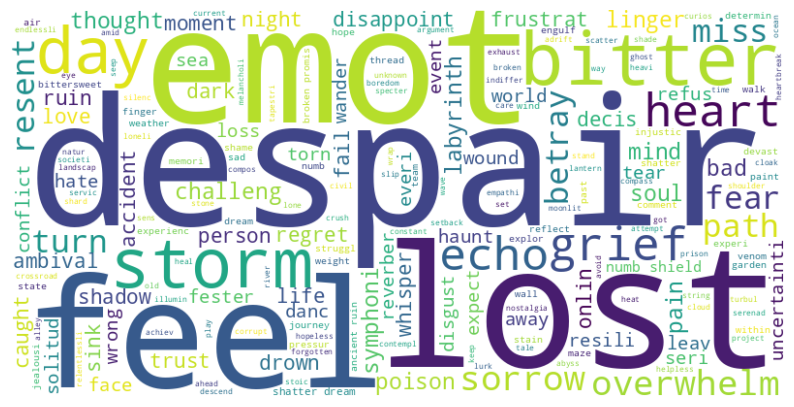

In [43]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [44]:
#data preprocessing
df2 = df1.copy()


In [45]:
#split Data
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Modelling
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [50]:
#Passive Aggressive Classifier
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [51]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [52]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.81      0.80        32
     neutral       0.73      0.55      0.62        55
    positive       0.67      0.82      0.74        60

    accuracy                           0.71       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.72      0.71      0.71       147



In [53]:
#Logistic Classifier
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [54]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [55]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.6326530612244898
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.50      0.64        32
     neutral       0.80      0.36      0.50        55
    positive       0.55      0.95      0.70        60

    accuracy                           0.63       147
   macro avg       0.75      0.60      0.61       147
weighted avg       0.72      0.63      0.61       147



In [56]:
#Random Fores Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [58]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.6530612244897959
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.59      0.70        32
     neutral       0.77      0.44      0.56        55
    positive       0.56      0.88      0.69        60

    accuracy                           0.65       147
   macro avg       0.73      0.64      0.65       147
weighted avg       0.71      0.65      0.64       147



In [59]:
#SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [60]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [61]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.5986394557823129
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.94      0.31      0.47        55
    positive       0.50      0.98      0.67        60

    accuracy                           0.60       147
   macro avg       0.82      0.56      0.56       147
weighted avg       0.78      0.60      0.57       147



In [62]:
#Multinomial NB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [63]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [64]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.90      0.35      0.50        55
    positive       0.53      1.00      0.69        60

    accuracy                           0.62       147
   macro avg       0.81      0.57      0.58       147
weighted avg       0.77      0.62      0.59       147



In [65]:
#Best Modelling: Passive Aggressive Classifier


In [66]:
#Hyperparameters
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [67]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

-- Epoch 1
Norm: 9.92, NNZs: 1467, Bias: -0.464986, T: 468, Avg. loss: 0.522383
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13.91, NNZs: 1496, Bias: -0.370255, T: 936, Avg. loss: 0.189774
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.56, NNZs: 1505, Bias: -0.347198, T: 1404, Avg. loss: 0.071065
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16.15, NNZs: 1505, Bias: -0.348670, T: 1872, Avg. loss: 0.023560
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 16.34, NNZs: 1505, Bias: -0.350289, T: 2340, Avg. loss: 0.006908
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16.39, NNZs: 1505, Bias: -0.351797, T: 2808, Avg. loss: 0.001933
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 16.40, NNZs: 1505, Bias: -0.352221, T: 3276, Avg. loss: 0.000385
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 16.40, NNZs: 1505, Bias: -0.352292, T: 3744, Avg. loss: 0.000070
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 16.40, NNZs: 1505, Bias: -0.352296, T: 4212, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

-- Epoch 1
Norm: 3.79, NNZs: 1566, Bias: -0.276000, T: 468, Avg. loss: 0.815820
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.21, NNZs: 1566, Bias: -0.447570, T: 936, Avg. loss: 0.426061
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.19, NNZs: 1566, Bias: -0.455381, T: 1404, Avg. loss: 0.301972
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8.12, NNZs: 1566, Bias: -0.433897, T: 1872, Avg. loss: 0.252497
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.20, NNZs: 1566, Bias: -0.418174, T: 2340, Avg. loss: 0.213354
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.25, NNZs: 1566, Bias: -0.399058, T: 2808, Avg. loss: 0.173419
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 11.22, NNZs: 1566, Bias: -0.382625, T: 3276, Avg. loss: 0.140141
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 12.01, NNZs: 1566, Bias: -0.364832, T: 3744, Avg. loss: 0.111115
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 12.76, NNZs: 1566, Bias: -0.352957, T: 4212, Avg. loss

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


-- Epoch 1
Norm: 3.71, NNZs: 1570, Bias: 0.000000, T: 468, Avg. loss: 0.902742
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.18, NNZs: 1570, Bias: 0.000000, T: 936, Avg. loss: 0.614385
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.53, NNZs: 1570, Bias: 0.000000, T: 1404, Avg. loss: 0.407029
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.14, NNZs: 1570, Bias: 0.000000, T: 1872, Avg. loss: 0.292677
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 12.30, NNZs: 1570, Bias: 0.000000, T: 2340, Avg. loss: 0.220935
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.17, NNZs: 1570, Bias: 0.000000, T: 2808, Avg. loss: 0.171170
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 13.85, NNZs: 1570, Bias: 0.000000, T: 3276, Avg. loss: 0.136413
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 14.41, NNZs: 1570, Bias: 0.000000, T: 3744, Avg. loss: 0.110294
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 14.96, NNZs: 1570, Bias: 0.000000, T: 4212, Avg. loss: 0.090

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [68]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}

In [69]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42, shuffle=False)

In [70]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [71]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [72]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.7278911564625851
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83        32
     neutral       0.74      0.56      0.64        55
    positive       0.68      0.83      0.75        60

    accuracy                           0.73       147
   macro avg       0.75      0.74      0.74       147
weighted avg       0.73      0.73      0.72       147



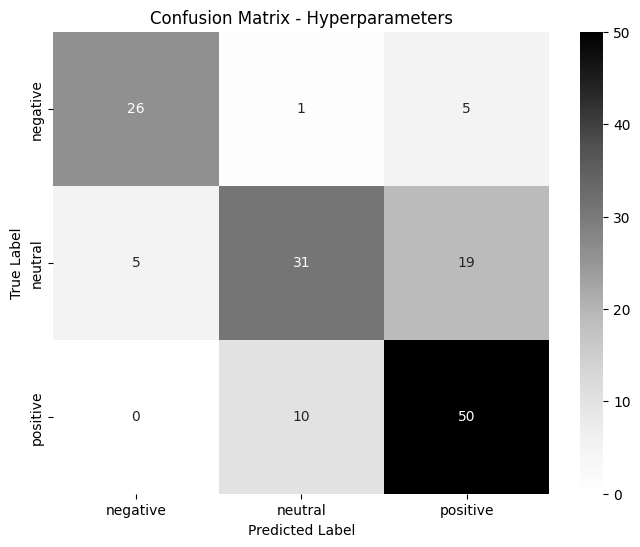

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()